In [16]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [30]:
class BankMarketingClustering:
    def __init__(self, file_path):
        """
        Initialize BankMarketingClustering object.
        Args:
        - file_path (str): Path to the dataset file.
        """
        self.file_path = file_path
        self.data = None
        self.cluster_labels = None

    def load_dataset(self):
        """
        Load the Bank Marketing dataset from the provided file path.
        """
        self.data = pd.read_csv(self.file_path, delimiter=';')

    def preprocess_data(self):
        """
        Preprocess the loaded dataset:
        - Drop irrelevant columns
        - Encode categorical variables
        - Standardize numerical features
        """
        # Drop irrelevant columns
        self.data.drop(['duration', 'contact', 'day_of_week', 'month', 'poutcome'], axis=1, inplace=True)

        # Convert categorical variables to numerical
        cat_cols = self.data.select_dtypes(include=['object']).columns
        label_encoders = {}
        for col in cat_cols:
            label_encoders[col] = LabelEncoder()
            self.data[col] = label_encoders[col].fit_transform(self.data[col])

        # Standardize numerical features
        scaler = StandardScaler()
        self.data[self.data.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(self.data.select_dtypes(include=['int64', 'float64']))

    def cluster_data(self, n_clusters=2):
        """
        Perform k-means clustering on the preprocessed dataset.
        Args:
        - n_clusters (int): Number of clusters to form.
        """
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        self.cluster_labels = kmeans.fit_predict(self.data)

    def visualize_clusters(self):
        """
        Visualize the clusters using PCA for dimensionality reduction.
        """
        pca = PCA(n_components=2)
        data_pca = pca.fit_transform(self.data)

        fig = px.scatter(x=data_pca[:, 0], y=data_pca[:, 1], color=self.cluster_labels, title='K-means Clustering of Bank Marketing Dataset', labels={'x': 'Principal Component 1', 'y': 'Principal Component 2'}, color_continuous_scale='viridis')
        fig.show()

    def visualize_confusion_matrix(self):
        """
        Visualize the confusion matrix.
        """
        confusion_matrix = pd.crosstab(index=self.data['y'], columns=self.cluster_labels)
        fig = go.Figure(data=go.Heatmap(z=confusion_matrix.values, x=['Cluster 0', 'Cluster 1'], y=['No', 'Yes'], colorscale='Viridis'))
        fig.update_layout(title='Confusion Matrix', xaxis_title='Cluster', yaxis_title='Actual', autosize=False)
        fig.show()

    def visualize_categorical_graph(self):
        """
        Visualize the distribution of the target variable.
        """
        fig = px.bar(self.data, x='y', title='Distribution of Target Variable', labels={'y': 'Target', 'count': 'Count'})
        fig.show()

    def visualize_categorical_distribution(self):
        """
        Visualize the distribution of the target variable using a bar chart.
        """
        target_distribution = self.data['y'].value_counts()
        fig = go.Figure(data=[go.Bar(x=target_distribution.index, y=target_distribution.values)])
        fig.update_layout(title='Distribution of Target Variable', xaxis_title='Target', yaxis_title='Count', autosize=False)
        fig.show()

    def visualize_elbow(self, max_clusters=10):
        """
        Visualize the elbow plot to determine the optimal number of clusters.
        Args:
        - max_clusters (int): Maximum number of clusters to consider.
        """
        model = KMeans(n_init=10)
        visualizer = KElbowVisualizer(model, k=(1, max_clusters))
        visualizer.fit(self.data)
        visualizer.show()

    def evaluate_clustering(self):
        """
        Evaluate the clustering performance using silhouette score.
        """
        silhouette_avg = silhouette_score(self.data, self.cluster_labels)
        print("Silhouette Score:", silhouette_avg)


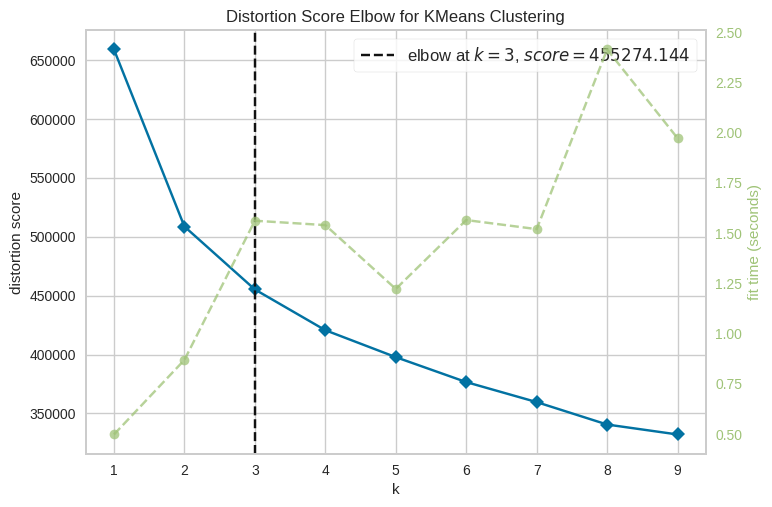

Silhouette Score: 0.27049450545738285


In [31]:
# Usage example:
if __name__ == "__main__":
    file_path = "./bank-additional-full.csv"
    bank_marketing_clustering = BankMarketingClustering(file_path)
    bank_marketing_clustering.load_dataset()
    bank_marketing_clustering.preprocess_data()
    bank_marketing_clustering.cluster_data(n_clusters=2)
    bank_marketing_clustering.visualize_clusters()
    bank_marketing_clustering.visualize_categorical_distribution()
    bank_marketing_clustering.visualize_confusion_matrix()
    bank_marketing_clustering.visualize_elbow()
    bank_marketing_clustering.evaluate_clustering()